# Programming Machine Learning Lab
# Exercise 2


**General Instructions:**

1. You need to submit the PDF as well as the filled notebook file.
1. Name your submissions by prefixing your matriculation number to the filename. Example, if your MR is 12345 then rename the files as **"12345_Exercise_2.xxx"**
1. Complete all your tasks and then do a clean run before generating the final pdf. (_Clear All Ouputs_ and _Run All_ commands in Jupyter notebook)

**Exercise Specific instructions::**

1. You are allowed to use only NumPy and Pandas (unless stated otherwise). You can use any library for visualizations.


In [2]:
#Import
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Data Handling**

For this exercise we will use the file **"train.csv"** and **"test.csv"**. The files includes a subset of dataset from **Categorical Feature Encoding Challenge** from Kaggle ([link]).

The dataset does not contain any numerical variables, and we will explore how to deal with non-numerical data variables.

[link]: https://www.kaggle.com/competitions/cat-in-the-dat/overview

**Data Exploration**

1. Read the dataset. There are multiple types of variable present in the dataset, some common types are

    - **Binary data** : A variable that has only 2 values.
    - **Categorical data** : A variable that can only take a limited number of values.
    - **Nominal data** : A variable that has no numerical importance. Like name of a person.
    - **Time Series data** : A variable that has some temporal value attached to it.
<br><br>


2. Explore the train dataset (both statistically and visually).
3. Identify which columns belong to which type of data.
4. Assume the columns with more than 50 unique values to be of nominal data type and remove them from both datasets.


In [3]:
### Write your code here
df=pd.read_csv('train.csv')
df_test=pd.read_csv('test.csv')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   x_1     80000 non-null  int64 
 1   x_2     80000 non-null  int64 
 2   x_3     80000 non-null  int64 
 3   x_4     80000 non-null  object
 4   x_5     80000 non-null  object
 5   x_6     80000 non-null  object
 6   x_7     80000 non-null  object
 7   x_8     80000 non-null  object
 8   x_9     80000 non-null  object
 9   x_10    80000 non-null  object
 10  x_11    80000 non-null  int64 
 11  x_12    80000 non-null  object
 12  x_13    80000 non-null  object
 13  x_14    80000 non-null  object
 14  x_15    80000 non-null  object
 15  day     80000 non-null  int64 
 16  month   80000 non-null  int64 
 17  y       80000 non-null  int64 
dtypes: int64(7), object(11)
memory usage: 11.0+ MB
None


In [5]:
print(df.describe()) # Useful for non-categorical data

                x_1           x_2           x_3          x_11           day  \
count  80000.000000  80000.000000  80000.000000  80000.000000  80000.000000   
mean       0.127075      0.255075      0.383088      1.479475      3.007750   
std        0.333059      0.435906      0.486142      0.713765      1.819404   
min        0.000000      0.000000      0.000000      1.000000      1.000000   
25%        0.000000      0.000000      0.000000      1.000000      2.000000   
50%        0.000000      0.000000      0.000000      1.000000      3.000000   
75%        0.000000      1.000000      1.000000      2.000000      4.000000   
max        1.000000      1.000000      1.000000      3.000000      7.000000   

              month             y  
count  80000.000000  80000.000000  
mean       5.784775      0.305887  
std        3.848748      0.460785  
min        1.000000      0.000000  
25%        2.000000      0.000000  
50%        4.000000      0.000000  
75%        9.000000      1.000000  


In [6]:
print("Number of null values column-wise")
print(df.isnull().sum())

Number of null values column-wise
x_1      0
x_2      0
x_3      0
x_4      0
x_5      0
x_6      0
x_7      0
x_8      0
x_9      0
x_10     0
x_11     0
x_12     0
x_13     0
x_14     0
x_15     0
day      0
month    0
y        0
dtype: int64


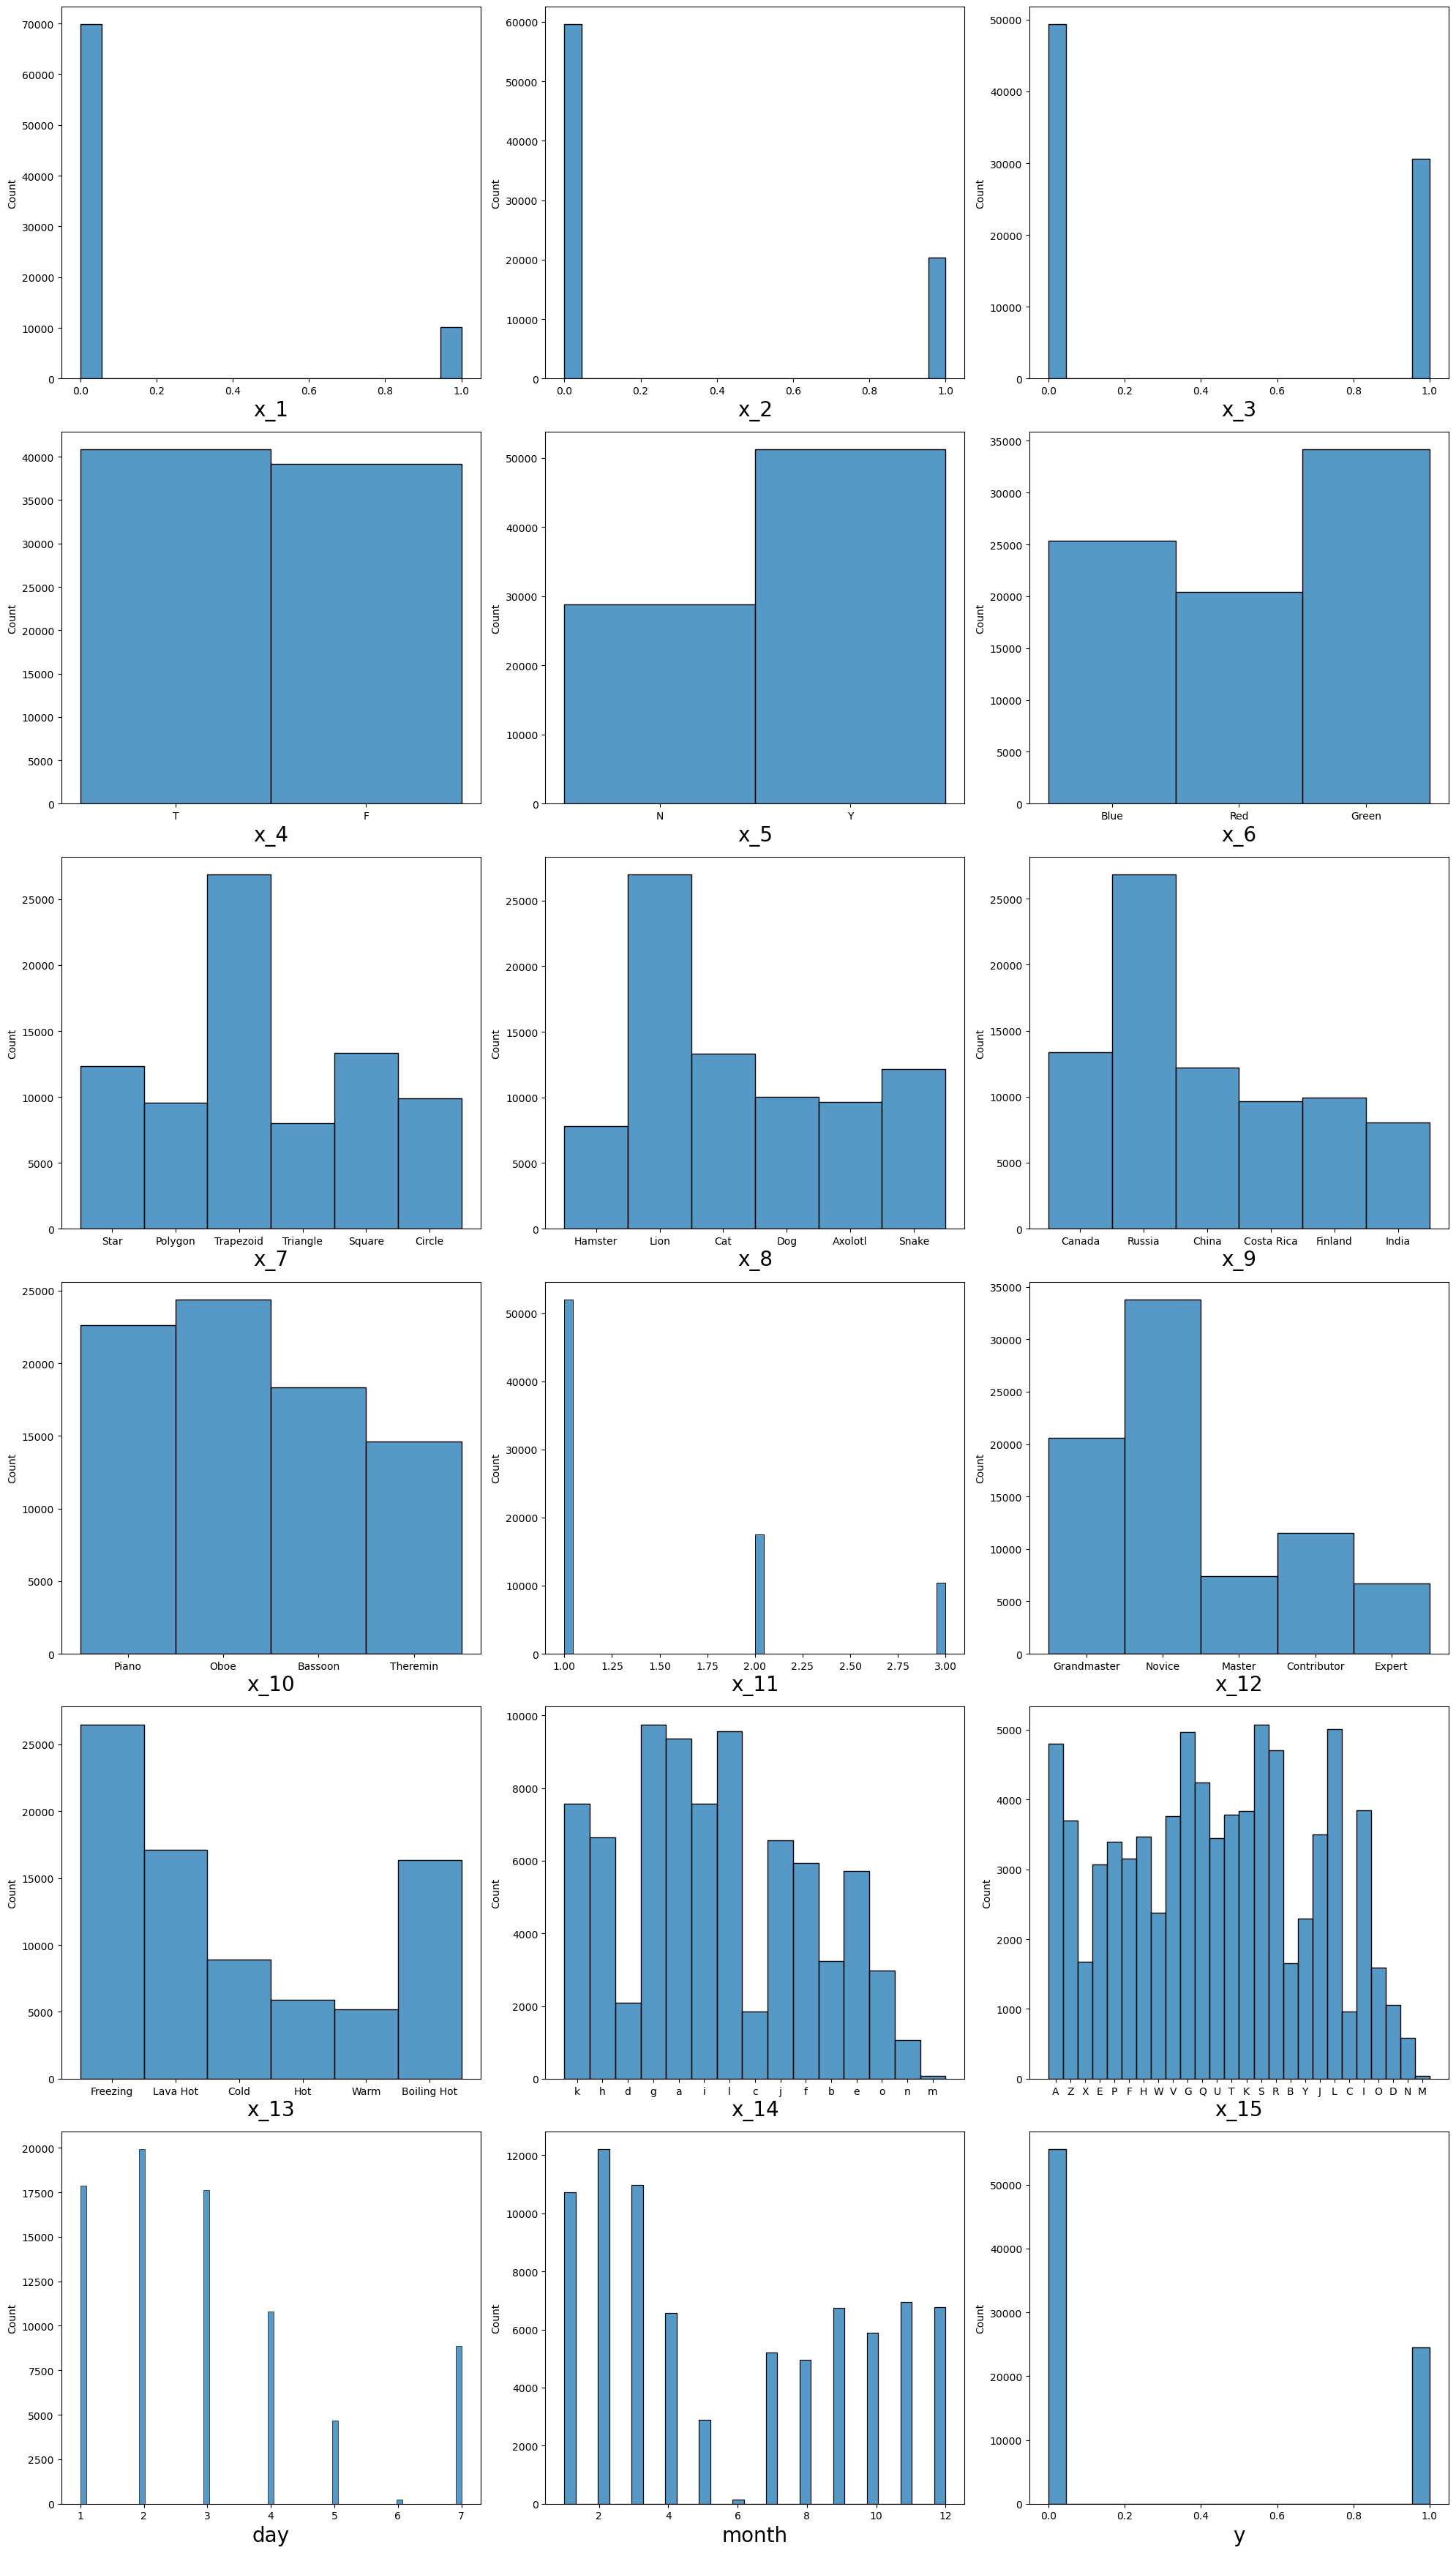

In [7]:
# let's see how data is distributed for every column in different classes
plt.figure(figsize=(20,35), facecolor='white')
plotnumber = 1
for column in df:
    if plotnumber<=18 :     # as there are 18 columns in the data
        ax = plt.subplot(6,3,plotnumber)
        sns.histplot(df[column])
        plt.xlabel(column,fontsize=20)

    plotnumber+=1
plt.tight_layout()
plt.show()

In [8]:
#To identify types of the columns
binary_columns=[]
ordinal_columns=['x_11','x_12','x_13','x_14','x_15']
nominal_columns=[]
categorical_columns=[]
time_series_data=['day','month']
for column in df.columns:
    print(f'{column} has datatype {df[column].dtype} and has {len(df[column].unique())} different values as: {df[column].unique()} ')
    if len(df[column].unique())==2:
        binary_columns.append(column)
    else:
        if column not in ['x_11','x_12','x_13','x_14','x_15','day','month'] :
            categorical_columns.append(column)

print(f'No of binary columns {len(binary_columns)}: {binary_columns}')
print(f'No of ordinal columns {len(ordinal_columns)}: {ordinal_columns}')
print(f'No of Categorical columns {len(categorical_columns)}: {categorical_columns}')
print(f'No of nominal columns {len(nominal_columns)}: {nominal_columns}')

x_1 has datatype int64 and has 2 different values as: [0 1] 
x_2 has datatype int64 and has 2 different values as: [1 0] 
x_3 has datatype int64 and has 2 different values as: [1 0] 
x_4 has datatype object and has 2 different values as: ['T' 'F'] 
x_5 has datatype object and has 2 different values as: ['N' 'Y'] 
x_6 has datatype object and has 3 different values as: ['Blue' 'Red' 'Green'] 
x_7 has datatype object and has 6 different values as: ['Star' 'Polygon' 'Trapezoid' 'Triangle' 'Square' 'Circle'] 
x_8 has datatype object and has 6 different values as: ['Hamster' 'Lion' 'Cat' 'Dog' 'Axolotl' 'Snake'] 
x_9 has datatype object and has 6 different values as: ['Canada' 'Russia' 'China' 'Costa Rica' 'Finland' 'India'] 
x_10 has datatype object and has 4 different values as: ['Piano' 'Oboe' 'Bassoon' 'Theremin'] 
x_11 has datatype int64 and has 3 different values as: [2 1 3] 
x_12 has datatype object and has 5 different values as: ['Grandmaster' 'Novice' 'Master' 'Contributor' 'Expert'

In [9]:
# There is no such nominal column with more than 50 categories
#So adding 1 dummy column having numbers between 0 to 60 and remove that from dataframe
df['dummy']=pd.Series(np.random.randint(61,size=(df.shape[0])))
df_test['dummy']=pd.Series(np.random.randint(61,size=(df_test.shape[0])))
# Adding this dummy variable
print(f'Columns of train.csv before removing nominal column {df.columns}')
print(f'Columns of test.csv before removing nominal column {df_test.columns}')
col_to_drop=['dummy']
for column in nominal_columns:
    if len(df[column].unique())>50:
        col_to_drop.append(column)
df.drop(col_to_drop,axis=1,inplace=True)
df_test.drop(col_to_drop,axis=1,inplace=True)
print(f'Columns of train.csv after removing nominal columns {df.columns}')
print(f'Columns of test.csv after removing nominal columns {df.columns}')

Columns of train.csv before removing nominal column Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'day', 'month', 'y', 'dummy'],
      dtype='object')
Columns of test.csv before removing nominal column Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'day', 'month', 'y', 'dummy'],
      dtype='object')
Columns of train.csv after removing nominal columns Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'day', 'month', 'y'],
      dtype='object')
Columns of test.csv after removing nominal columns Index(['x_1', 'x_2', 'x_3', 'x_4', 'x_5', 'x_6', 'x_7', 'x_8', 'x_9', 'x_10',
       'x_11', 'x_12', 'x_13', 'x_14', 'x_15', 'day', 'month', 'y'],
      dtype='object')


Plot the target ratio of all categorical column. The target ratio is the average of the target for a specific value. For example in the given table,

<table style="width : 20%">
    <tr>
    <th>Country</th>
    <th>Target</th>
    </tr>
    <tr>
    <td>Germany</td>
    <td>1</td>
    </tr>
    <tr>
    <td>France</td>
    <td>0</td>
    </tr>
    <tr>
    <td>Germany</td>
    <td>0</td>
    </tr>
    <tr>
    <td>France</td>
    <td>1</td>
    </tr>
    </tr>
    <tr>
    <td>Germany</td>
    <td>1</td>
    </tr>
</table>

Target Ratio for Germany = [Number of true targets under the label Germany/ Total Number of targets under the label Germany]
which is 2/3 = 0.66.

 Hence, the target ratios for the values would then be:

<table style="width : 20%">
    <tr>
    <th>Values</th>
    <th>Target Ratios</th>
    </tr>
    <tr>
    <td>Germany</td>
    <td>0.66</td>
    </tr>
    <tr>
    <td>France</td>
    <td>0.50</td>
    </tr>
</table>

 Target Ratios for column x_1 :
   Values  TargetRatios
0     0.0      0.305095
1     1.0      0.311332
 Target Ratios for column x_2 :
   Values  TargetRatios
0     1.0      0.239880
1     0.0      0.328489
 Target Ratios for column x_3 :
   Values  TargetRatios
0     1.0      0.316507
1     0.0      0.299293
 Target Ratios for column x_4 :
  Values  TargetRatios
0      T      0.302347
1      F      0.309583
 Target Ratios for column x_5 :
  Values  TargetRatios
0      N      0.334074
1      Y      0.290041
 Target Ratios for column x_6 :
  Values  TargetRatios
0   Blue      0.242855
1    Red      0.347986
2  Green      0.327482
 Target Ratios for column x_7 :
      Values  TargetRatios
0       Star      0.309957
1    Polygon      0.309447
2  Trapezoid      0.288408
3   Triangle      0.367934
4     Square      0.340317
5     Circle      0.248279
 Target Ratios for column x_8 :
    Values  TargetRatios
0  Hamster      0.361455
1     Lion      0.288684
2      Cat      0.337889
3      Do

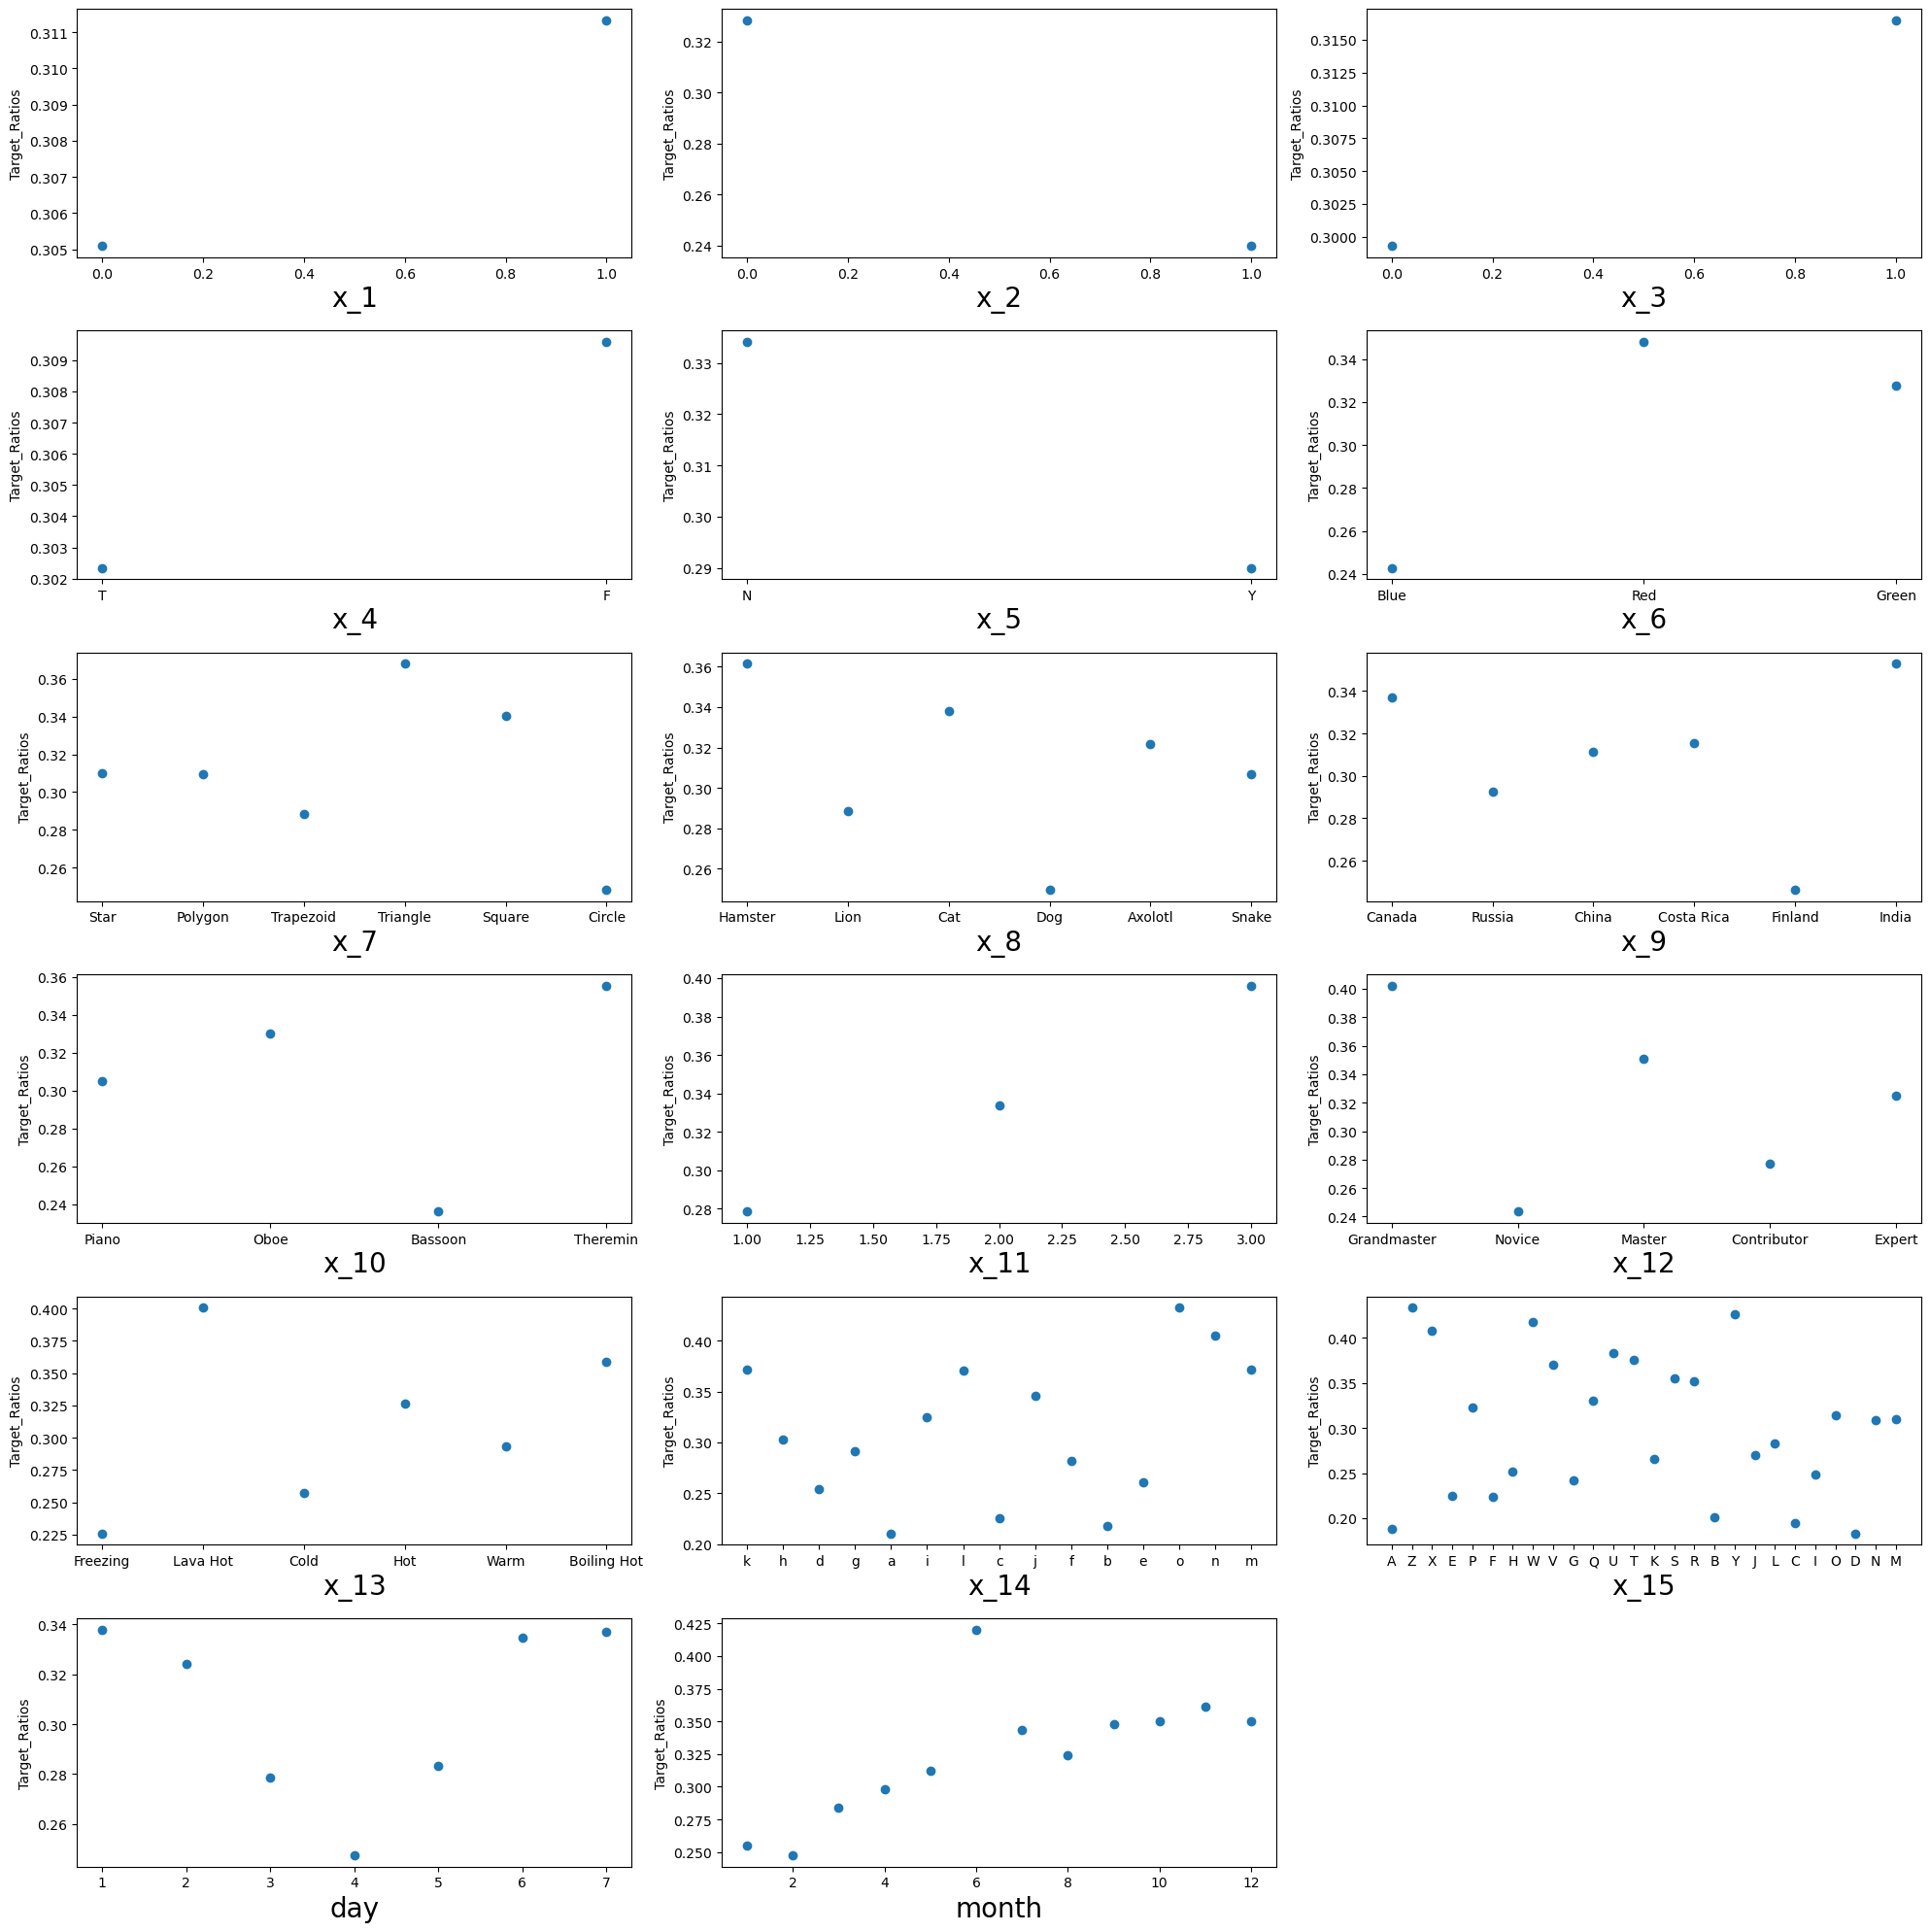

In [10]:
### Write your code here

columns=list(df.columns)
columns=columns[:-1]  # Removing target column y
plt.figure(figsize=(20,20),facecolor='white')
plotnumber=1
for column in columns:
    df_tr=pd.DataFrame(columns=['Values','TargetRatios'])
    for values in df[column].unique():
        x=len(df[(df[column]==values) & (df['y']==1)])
        y=(df[column].value_counts())[values]
        df_tr.loc[len(df_tr.index)] = [values,(x/y)]

    print(f' Target Ratios for column {column} :')
    print(df_tr)
    ax=plt.subplot(6,3,plotnumber)
    plt.scatter(df_tr['Values'],df_tr['TargetRatios'])
    plt.xlabel(column,fontsize=20)
    plt.ylabel('Target_Ratios')
    plotnumber+=1
    
plt.tight_layout()
plt.show()

**Ordinal Data**

There is special type of categorical variable which is called **Ordinal**. The ordinal variable has some order associated with it. Check which of the categorical columns are ordinal in nature. An example of ordinal values would (baby, child, teenager, adult, elder). From the plots generated earlier, determine which of the categorical columns are ordinal in nature.

*Hint: Sorting the "Values" or "Target Ratios" in alphabetic order may reveal their ordinal nature.*

In [11]:
### Write your code here

#First just checking unique values by arranging in alphabetical order to check if there is any order related or not.
ord_col=[]
for c in df.columns:
    if df[c].dtype==object:
        print(f'for column {c} : {sorted(df[c].unique())}')

# From the above code we find out that columns x_14 and x_15 have meaningful ordering so appending both cols in ord_col[]
ord_col.append('x_14')
ord_col.append('x_15')

# Also checking for numeric columns with more than 2 categories
for c in df.columns:
    if len(df[c].unique())>2:
        if df[c].dtype=='int64':
            print(f'for column {c} : {sorted(df[c].unique())}')

# After running above code we can find that x_11,day and month have meaningful ordering but day and month are time data so adding x_11
ord_col.append('x_11')

# Checking using target ratios
# After analysing the graphs of target ratio from above columns x_12 and x_13 have some logical ordering as per target ratios.
print(sorted(dict(df.groupby('x_12')['y'].mean()).items(),key=lambda x:x[1]))
print(sorted(dict(df.groupby('x_13')['y'].mean()).items(),key=lambda x:x[1]))

# So adding both columns to ordinal data
ord_col.extend(['x_12','x_13'])
print(ord_col)

for column x_4 : ['F', 'T']
for column x_5 : ['N', 'Y']
for column x_6 : ['Blue', 'Green', 'Red']
for column x_7 : ['Circle', 'Polygon', 'Square', 'Star', 'Trapezoid', 'Triangle']
for column x_8 : ['Axolotl', 'Cat', 'Dog', 'Hamster', 'Lion', 'Snake']
for column x_9 : ['Canada', 'China', 'Costa Rica', 'Finland', 'India', 'Russia']
for column x_10 : ['Bassoon', 'Oboe', 'Piano', 'Theremin']
for column x_12 : ['Contributor', 'Expert', 'Grandmaster', 'Master', 'Novice']
for column x_13 : ['Boiling Hot', 'Cold', 'Freezing', 'Hot', 'Lava Hot', 'Warm']
for column x_14 : ['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o']
for column x_15 : ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
for column x_11 : [1, 2, 3]
for column day : [1, 2, 3, 4, 5, 6, 7]
for column month : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
[('Novice', 0.24352147674831381), ('Contributor', 0.27699530516431925), ('Expert

**Data Encoding**

Since the ML models can only deal with numerical data, we need to encode our dataset accordingly. Read up on how to encode the different types of variables and then perform the encoding.

- Encode binary labels as 0/1, if needed.
- To encode Categorical Variables, implement one-hot encoding from scratch.
- For Ordinal Variable, map the variables to numeric values. In case of the example given above, the mapping would be {baby:0, child:1, teenager:2, adult:3, elder:4}.
- Treat the time-series data (day/month) as cyclical features and encode them into two-dimensional sin-cos features. (Read on cyclical encoding of time).


Once the dataset is encoded, create a correlation heatmap using binary, ordinal and time-series variables (i.e. all variable except the one-hot encoded categorical variables).

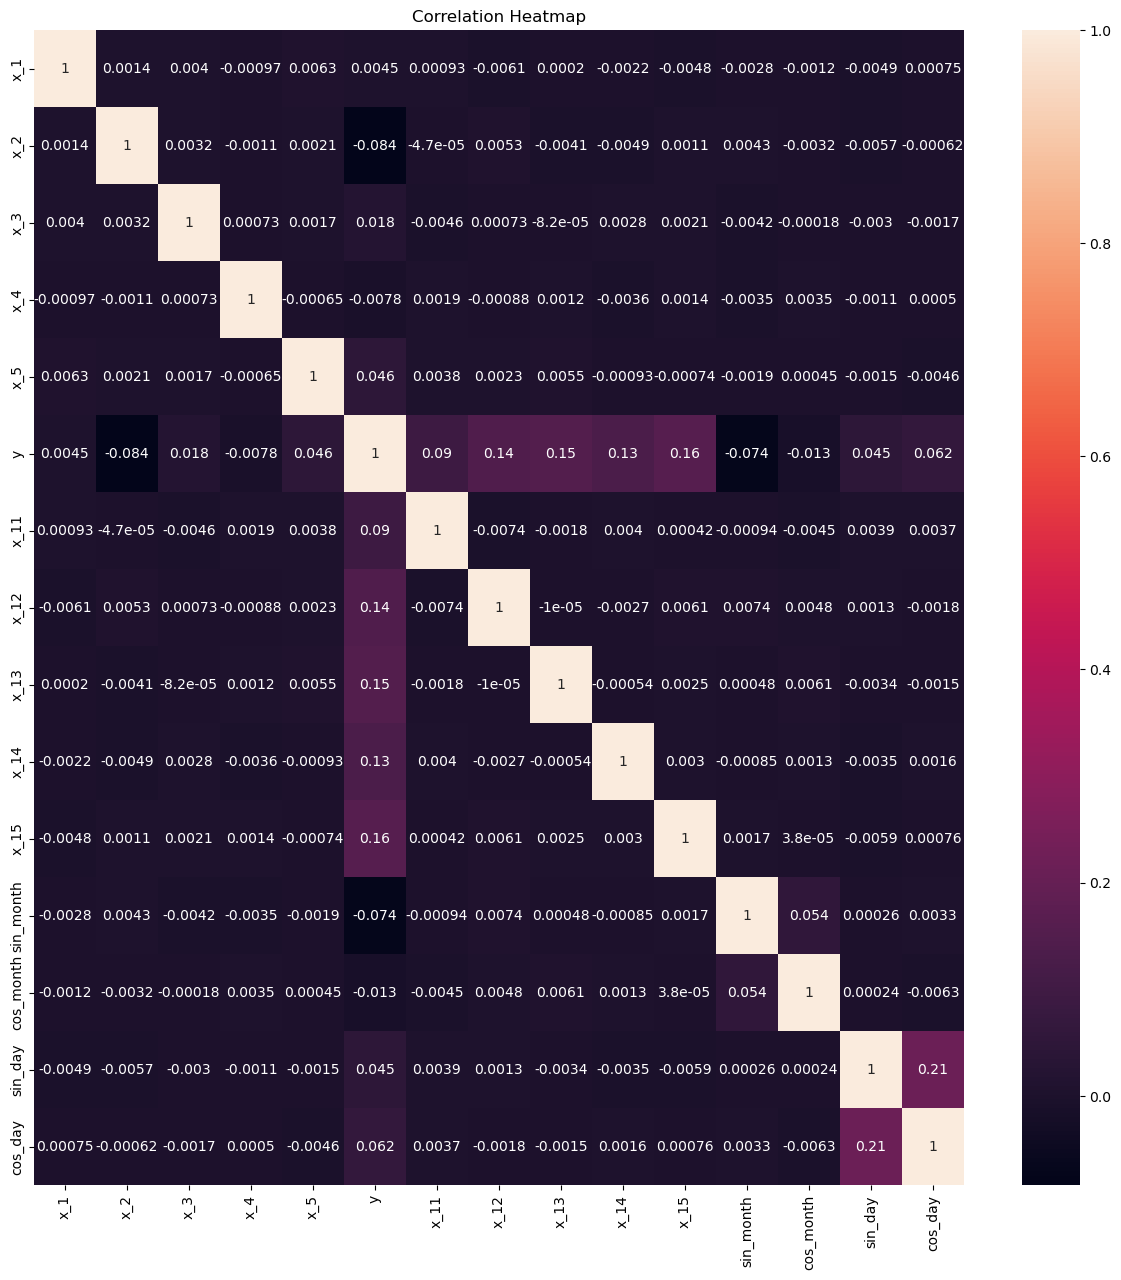

In [12]:
### Write your code here
import seaborn as sns
df_new=pd.DataFrame()
# Encoding for binary_columns calculated in ques 1
for column in binary_columns:
    if df[column].dtype!='int64':
        values=df[column].unique()
        map_values={values[0]:1,values[1]:0}
        df_new[column]=df[column].map(map_values)
    else:
        df_new[column]=df[column]
# One Hot Encoding for categorical variables derived in ques 1
for column in categorical_columns:
    unique_values=df[column].unique()
    for unique_value in unique_values:
        df_new[column+'_'+str(unique_value)]=np.array((df[column]==unique_value),dtype='int64')

# Encoding for Ordinal variables which are non int:
df_new['x_11']=df['x_11'] #as this column already has numerical values
df_new['x_12']=df['x_12'].map({'Novice':1,'Contributor':2,'Expert':3,'Master':4,'Grandmaster':5})
df_new['x_13']=df['x_13'].map({'Freezing':1,'Cold':2,'Warm':3,'Hot':4,'Boiling Hot':5,'Lava Hot':6})
df_new['x_14']=df['x_14'].map(dict([(chr(97+i),i) for i in range(15)]))
df_new['x_15']=df['x_15'].map(dict([(x,ord(x)-65) for x in df['x_15'].unique()]))

#Clyclical encoding of month and day
df_new['sin_month']=np.sin((2*np.pi*df['month'])/max(df['month']))
df_new['cos_month']=np.cos((2*np.pi*df['month'])/max(df['month']))
df_new['sin_day']=np.sin((2*np.pi*df['day'])/max(df['day']))
df_new['cos_day']=np.cos((2*np.pi*df['day'])/max(df['day']))

correlation_matrix=df_new[binary_columns+ordinal_columns+['sin_month','cos_month','sin_day','cos_day']].corr()

plt.figure(figsize=(15,15))
sns.heatmap(correlation_matrix,annot=True )
plt.title('Correlation Heatmap')
plt.show()

**Binary Encoding**

Another way of encoding categorical data is called Binary encoding. Read up on binary encoding and implement a function that takes in a column of categorical values and returns the encoded values. Also comment on the pros and/or cons of using Binary Encoding vs One-hot encoding.

In [13]:
### Write your code here
import math

# Function which will return binary equivalent of decimal number as str.
def binary(x,no_of_new_col):
    out=""
    while(x>=1):
        out+=str(x%2)
        x=x//2
    out+=('0'*(no_of_new_col-len(out)))
    return out[::-1]


def binary_encoding(col_name):
  # First we need to map categorical values to a number then convert into binary no and make column for each digit in the converted value.
    df_new=pd.DataFrame()
    num_of_values=len(df[col_name].unique())
    no_of_new_col=math.ceil(math.log(num_of_values,2))      # Log(N) base 2 can also be calculate by np.log(N)/np.log(2)
    uniq_val=list(df[col_name].unique())
    if df[col_name].dtype!='int64':
        df_new[col_name]=df[col_name].map(dict(zip(uniq_val,range(0,num_of_values))))
  # We can also calculate binary equivalent using bin(x)[2:] but not using inbuilt function.
    df_new[col_name+"_"+'bin-eq']=df_new[col_name].apply(binary,no_of_new_col=no_of_new_col)

    for col_num in range(0,no_of_new_col):
        df_new[col_name+"_"+str(col_num)]=df_new[col_name+"_"+'bin-eq'].apply(lambda x:int(x[col_num]))

    return df_new

df_new=binary_encoding('x_15')
#Here the output is dataframe having column given as input, its binary equivalent and binary encoded features.
# If we want only encoded features we can remove input column and its binary equivalent
df_new.head(20)

,x_15,x_15_bin-eq,x_15_0,x_15_1,x_15_2,x_15_3,x_15_4
0,0,00000,0,0,0,0,0
1,1,00001,0,0,0,0,1
2,2,00010,0,0,0,1,0
3,3,00011,0,0,0,1,1
4,4,00100,0,0,1,0,0
5,5,00101,0,0,1,0,1
6,6,00110,0,0,1,1,0
7,7,00111,0,0,1,1,1
8,8,01000,0,1,0,0,0
9,9,01001,0,1,0,0,1


**Pros of using binary_encoding over One-hot encoding:**

1.In OHE if we have k different categories then we need k-1 columns to represent that categories. k-1 because we remove one column to be safe from dummy variable trap. But when we use binary encoding then we need less number of columns to represnt k categories no of columns= log(k) base 2.


2.By representing the data with less number of features binary encoding can reduce dimensionality of the input data hence save us from curse of dimensionality i.e. having large number of features in data causes overfitting of the machine learning model which leads to decreased performance of the model.

**Cons of using binary_encoding over One-hot encoding:**

1.Binary encoding is more complex to implement and understand than one hot encoding especially for person with non-technical backgrounds.


2.It becomes difficult for human to interpret the result. There will be no direct relationship between the output and features So it reduce human interpretability.